# House Price Prediction Using Machine learning


## Step 1: Importing Libraries and Dataset
In the first step we load the libraries which is needed for Prediction:

* **Pandas** - To load the Dataframe
* **Matplotlib** - To visualize the data features i.e. barplot
* **Seaborn** - To see the correlation between features using heatmap

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

ds = pd.read_csv("HousePricePrediction.csv")
print(ds.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [79]:
ds.shape

(2919, 13)

## Step 2: Data Preprocessing
 Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 

In [80]:
obj = (ds.dtypes == 'object')
obj_col = list(obj[obj].index)
print("Categorical:", len(obj_col))

int_ = (ds.dtypes == 'int')
int_cols = list(int_[int_].index)
print("Integer:", len(int_cols))

fl_ = (ds.dtypes == 'float')
fl_cols = list(fl_[fl_].index)
print("Float:", len(fl_cols))

Categorical: 4
Integer: 0
Float: 3


## Step 3: Exploratory Data Analysis
**EDA** refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables. So here let's make a heatmap using seaborn library.

<Axes: >

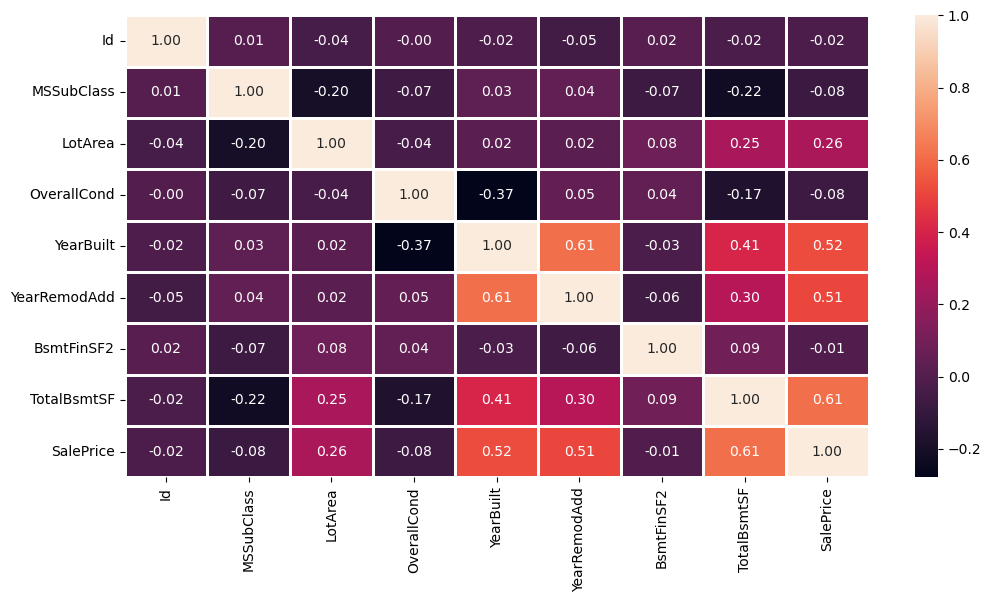

In [81]:
num_ds = ds.select_dtypes(include=['number'])
plt.figure(figsize=(12,6))
sn.heatmap(num_ds.corr(),
          robust = 'BrBG',
          fmt = '.2f',
          linewidths = 2,
          annot = True)

To analyze the different categorical features. Let's draw the barplot.

<Axes: title={'center': 'No.Unique values of categorical features'}>

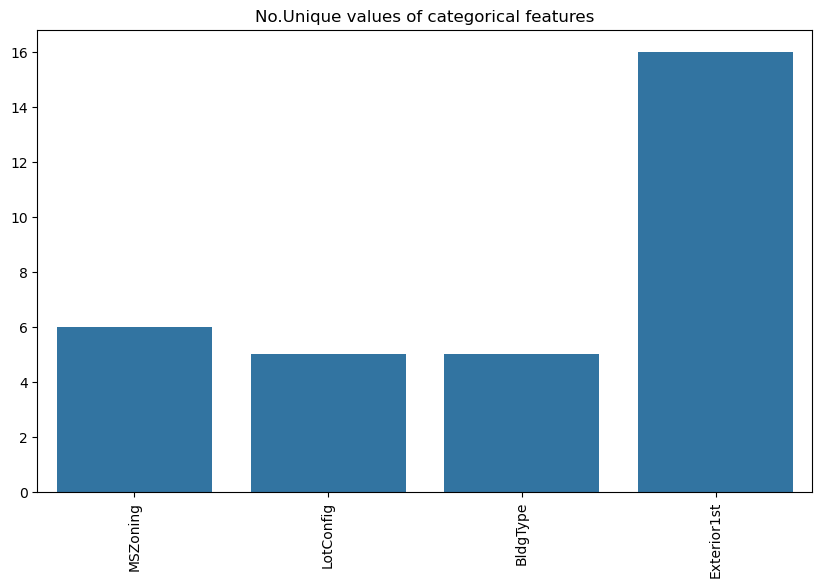

In [82]:
unique_values = []
for col in obj_col:
    unique_values.append(ds[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No.Unique values of categorical features')
plt.xticks(rotation=90)
sn.barplot(x=obj_col, y=unique_values)

 The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

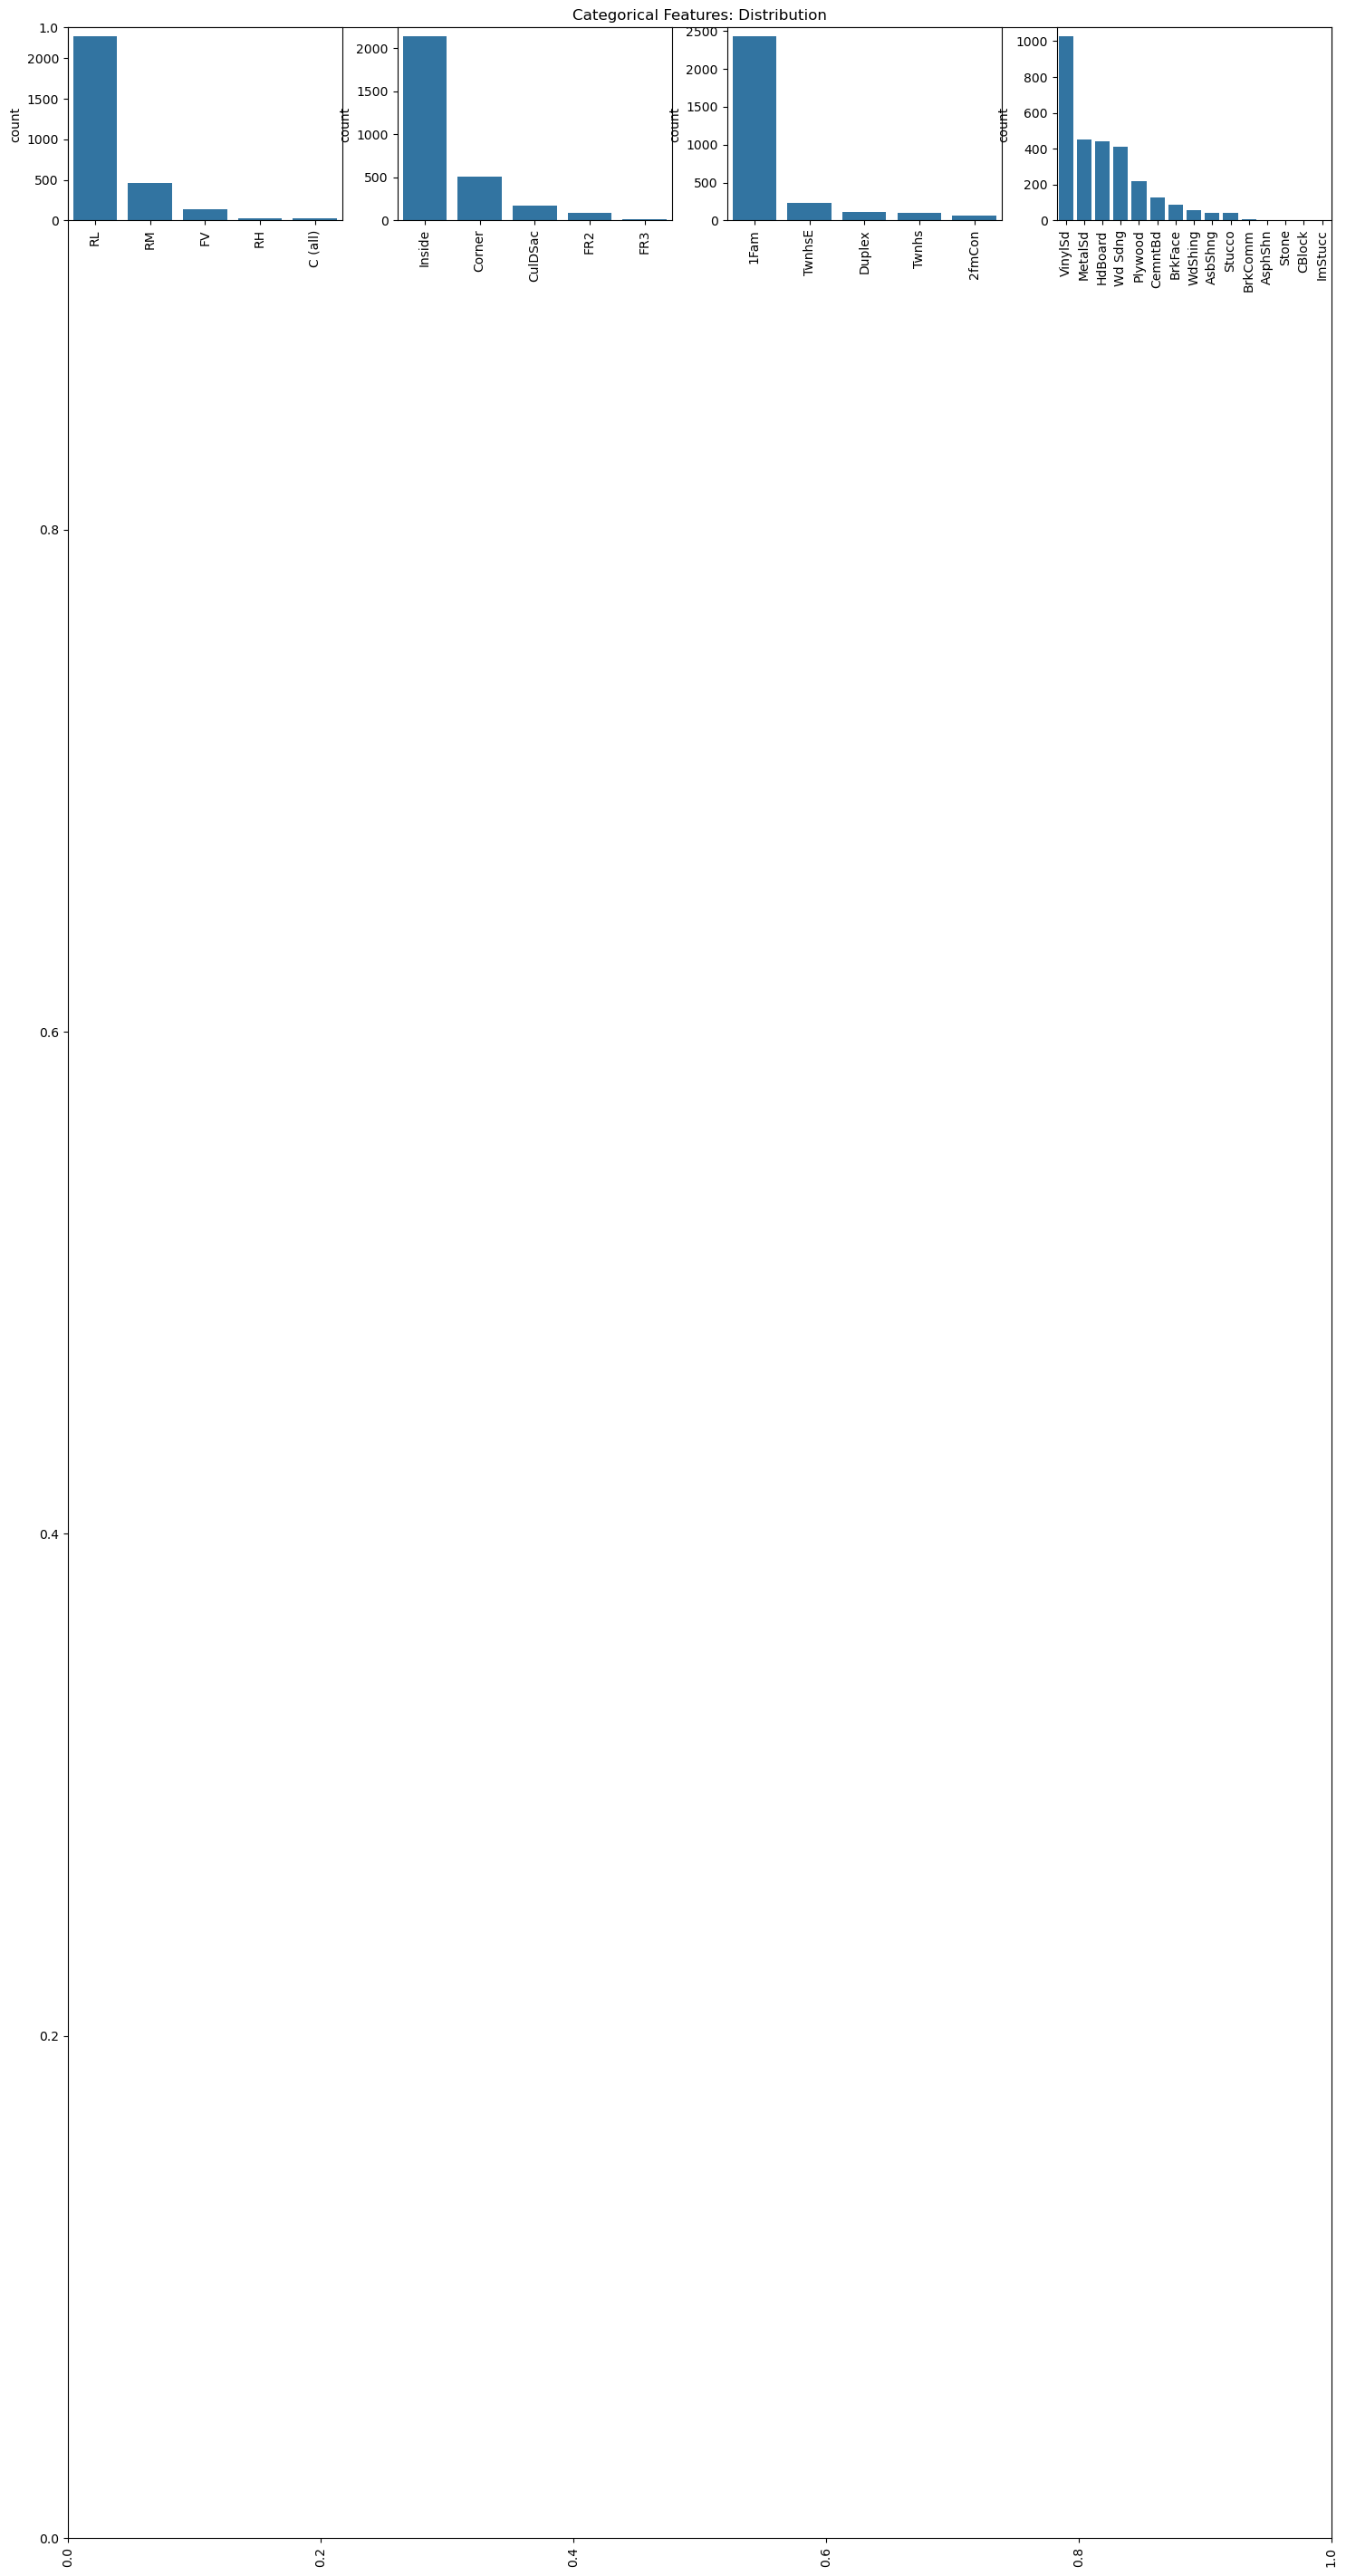

In [83]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in obj_col:
    y = ds[col].value_counts()
    plt.subplot(11,4, index)
    plt.xticks(rotation=90)
    sn.barplot(x=list(y.index), y=y)
    index += 1

## Step 4: Data Cleaning
**Data Cleaning** is the way to improvise the data or remove incorrect, corrupted or irrelevant data. As in our dataset there are some columns that are not important and irrelevant for the model training. So we can drop that column before training. There are 2 approaches to dealing with empty/null values

* We can easily delete the column/row (if the feature or record is not much important).
* Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).
As Id Column will not be participating in any prediction. So we can Drop it.

In [84]:
ds.drop(['Id'],
        axis = 1,
        inplace = True)

Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [85]:
ds['SalePrice'] = ds['SalePrice'].fillna(ds['SalePrice'].mean())

Drop records with null values (as the empty records are very less).

In [86]:
new_ds = ds.dropna()

Checking features which have null values in the new dataframe (if there are still any).

In [87]:
new_ds.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

## Step 5: OneHotEncoder - For Label categorical features
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using **OneHotEncoder**, we can easily convert object data into int. So for that firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [88]:
from sklearn.preprocessing import OneHotEncoder
s = (new_ds.dtypes == 'object')
obj_col = list(s[s].index) 
print('Categorical variables:')
print(obj_col)
print('No.of.categorical features:',
     len(obj_col))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No.of.categorical features: 4


Then once we have a list of all the features. We can apply **OneHotEncoding** to the whole list.

In [89]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_col = pd.DataFrame(OH_encoder.fit_transform(new_ds[obj_col]))
OH_col.index = new_ds.index
OH_col.columns = OH_encoder.get_feature_names_out()
df_final = new_ds.drop(obj_col, axis = 1)
df_final = pd.concat([df_final, OH_col], axis = 1)

## Step 6: Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis = 1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

## Step 7: Model Training and Accuracy
As we have to train the model to determine the continuous values, so we will be using these regression models.

SVM-Support Vector Machine
Random Forest Regressor
Linear Regressor
And To calculate loss we will be using the **mean_absolute_percentage_error** module. It can easily be imported by using sklearn library. The formula for 

Mean Absolute Error is:

                              MAE = 1/n ∑^n i = 1 |yi - ＾yi|
                              

## 1. SVM - Support vector Machine
**Support vector Machine** is a supervised machine learning algorithm primarily used for classification tasks though it can also be used for regression. It works by finding the hyperplane that best divides a dataset into classes. The goal is to maximize the margin between the data points and the hyperplane.

In [90]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


## 2. Random Forest Regression
**Random Forest** is an ensemble learning algorithm used for both classification and regression tasks. It constructs multiple **decision trees** during training where each tree in the forest is built on a random subset of the data and features, ensuring diversity in the model. The final output is determined by averaging the outputs of individual trees (for regression) or by majority voting (for classification).

In [91]:
from sklearn.ensemble import RandomForestRegressor
model_RFR  = RandomForestRegressor(n_estimators = 10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.19127973482167207

## 3. Linear Regression
**Linear Regression** is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. The goal is to find the line that best fits the data. This is done by minimizing the sum of the squared differences between the observed and predicted values. Linear regression assumes that the relationship between variables is linear.

In [92]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841600051


Clearly SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 
**0.18 approx**. To get much better results ensemble learning techniques like **Bagging** and **Boosting** can also be used.